## use Exovetter to vet a TCE from the false alarm run.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as p
import exovetter
from exovetter.tce import Tce
from exovetter import const 
import astropy.units as u
import lightkurve as lk
import corazon as crz
import exovetter.vetters as vet

/Users/smullally/.local/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
#Useful functions

In [3]:
def make_tce(adf):
    
    atce = Tce(period = adf['period'] * u.day,
               epoch = adf['epoch'] *u.day,
               epoch_offset = 0 * u.day,
               duration=adf['dur'] * u.hr, 
               depth=adf['depth'] * const.ppm,
               snr = adf['snr'])
    
    return atce


def vet_tce(tce, lc, tpf):
    """Pull up plots of the full and folded light curve.
        There are all plot from exovetter
    """

    oe = vet.OddEven()
    oddeven = oe.run(tce,lc)
    oe.plot()
    
    tc = vet.TransitPhaseCoverage()
    tpc = tc.run(tce,lc)
    #tc.plot()
    
    mod = vet.ModShift()
    modshift = mod.run(tce, lc)
    mod.plot()
    
    sweet = vet.Sweet()
    sweetvet = sweet.run(tce,lc)
    sweet.plot()
    
    
    cent = vet.Centroid()
    centvet = cent.run(tce, tpf, plot=True)
    
    return oddeven, tpc, modshift, sweetvet, centvet

def get_lk(tcedf, author = "qlp", mission = "TESS", size = 11):
    """Returns lc and tpf given a dataframe line"""
    
    ticid = tcedf['tic'][4:]
    sector = tcedf['sector']
    
    lc = crz.gen_lightcurve.hlsp(ticid, sector, author=author)
    tpf = lk.search_tesscut(f"TIC {ticid}", sector = sector).download(cutout_size = size)
    
    return lc, tpf

In [4]:
#Get list of TCEs we could vet from teh summary file found in the top level directory
qlp_tces = "/Users/smullally/Science/tess_false_alarms/vet_results/joe_mar_2021/second-dataset/qlp_ebplanets_tcesum.csv"
col_names = ["tic","pn","sector","period","epoch","depth","dur","snr","disp","reason"]
qlp_df = p.read_csv(qlp_tces, names=col_names)

In [5]:
#Get lightkurve and targetpixel file for t
ticid = "TIC 120251825"
sector = 14
tcedf = qlp_df.query('tic == @ticid & sector == @sector')
print(tcedf)
alc, atpf = get_lk(tcedf.iloc[1])

              tic  pn  sector  period      epoch       depth  dur   snr  \
48  TIC 120251825   1      14  1.5098  1683.7183  748209.592  2.0  3.60   
49  TIC 120251825   2      14  1.5098  1684.4683  767513.015  2.0  7.03   
50  TIC 120251825   3      14  1.5091  1683.7183  278923.956  4.0  3.52   
51  TIC 120251825   4      14  1.5099  1684.4683  288421.492  4.0  8.39   
52  TIC 120251825   5      14  1.5115  1683.7058   68732.130  4.0  6.36   
53  TIC 120251825   6      14  1.3941  1684.4745    6044.676  8.0  0.59   

     disp                                    reason  
48   FAIL   -NormLPP--SWEETHalfPeriod-SWEETAtPeriod  
49   FAIL   -NormLPP--SWEETHalfPeriod-SWEETAtPeriod  
50   FAIL   -NormLPP--SWEETHalfPeriod-SWEETAtPeriod  
51   FAIL   -NormLPP--SWEETHalfPeriod-SWEETAtPeriod  
52   FAIL   -NormLPP--SWEETHalfPeriod-SWEETAtPeriod  
53   FAIL                         -LowSNR--NormLPP-  


Transit 0
Transit 1
Transit 2
Transit 3
Transit 4
Transit 5
Transit 6
Transit 7
Transit 8
Transit 9
Transit 10
Transit 11
Transit 12
Transit 13
Transit 14
Transit 15
Transit 16
Transit 17


({'oe_sigma': 0.5993212645120318,
  'odd_depth': [1.000983, 0.007904451],
  'even_depth': [1.0076826, 0.007904451]},
 None,
 None,
 {'msg': 'WARN: SWEET test finds signal at HALF transit period',
  'amp': array([[2.44045039e-01, 8.80829237e-03, 2.77062827e+01],
         [1.38517270e-02, 1.14621879e-02, 1.20847146e+00],
         [1.16699587e-03, 1.14690850e-02, 1.01751437e-01]])},
 {'offset': 0.3879960943679538, 'significance': array([0.99403293])})

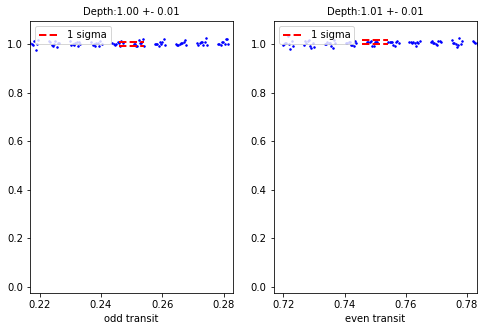

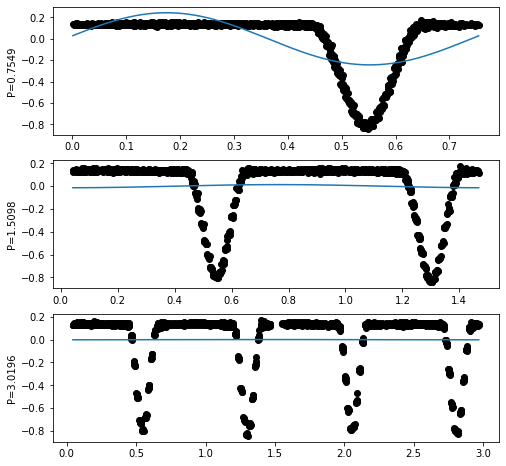

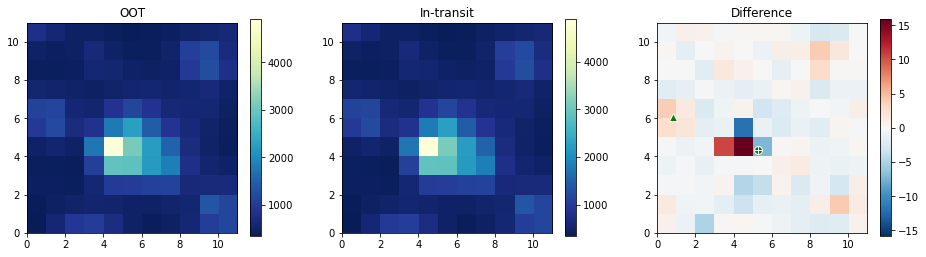

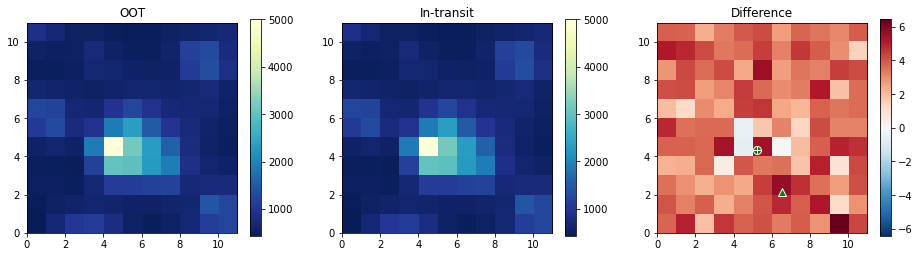

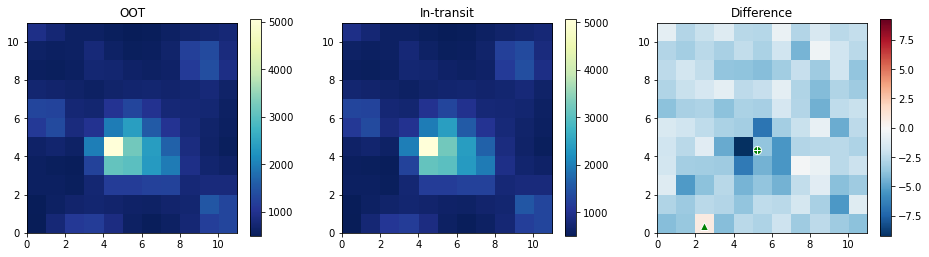

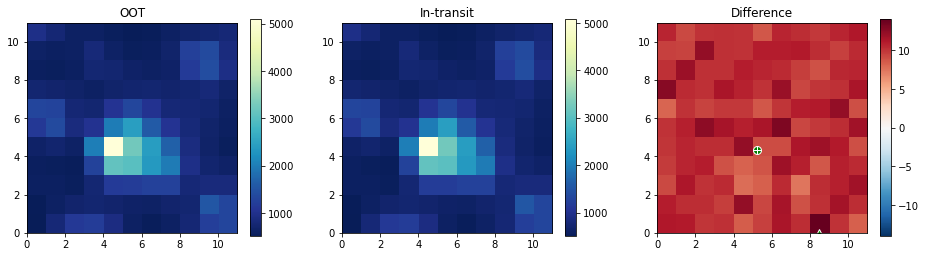

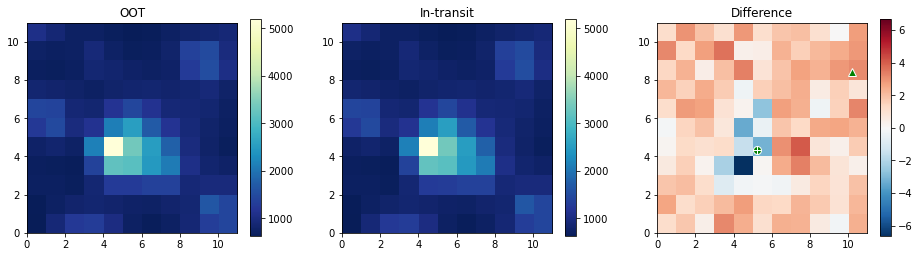

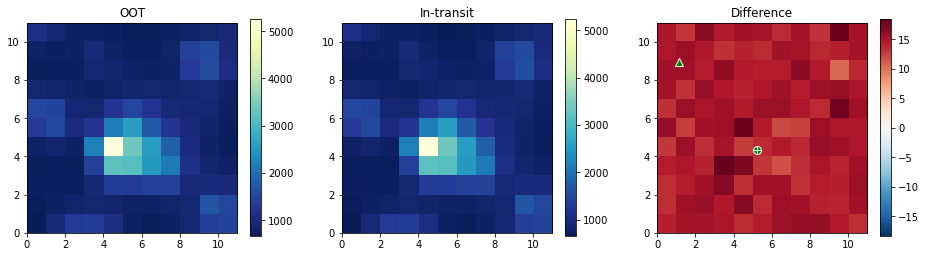

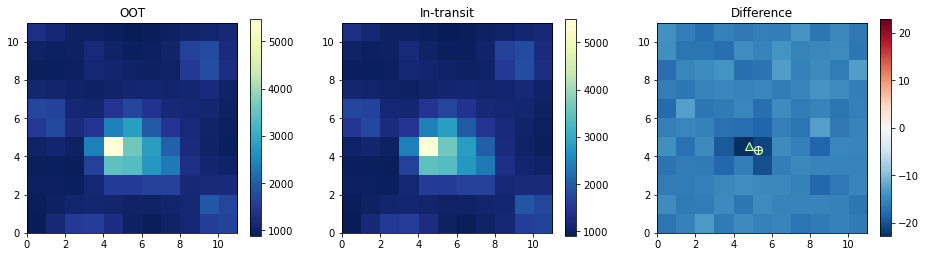

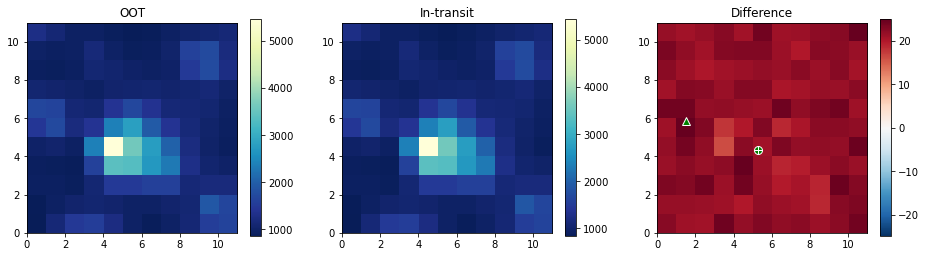

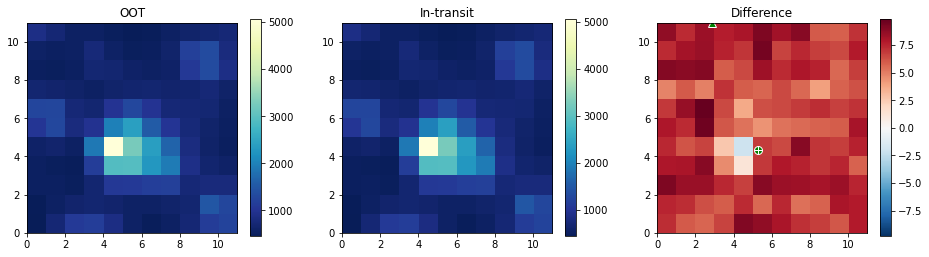

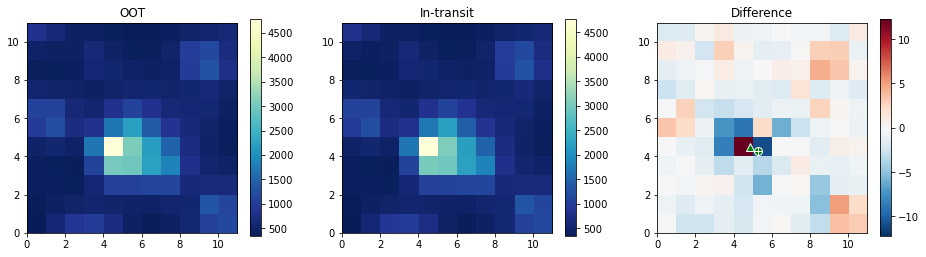

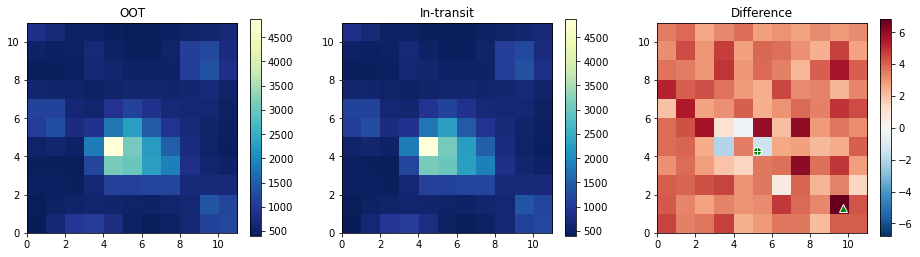

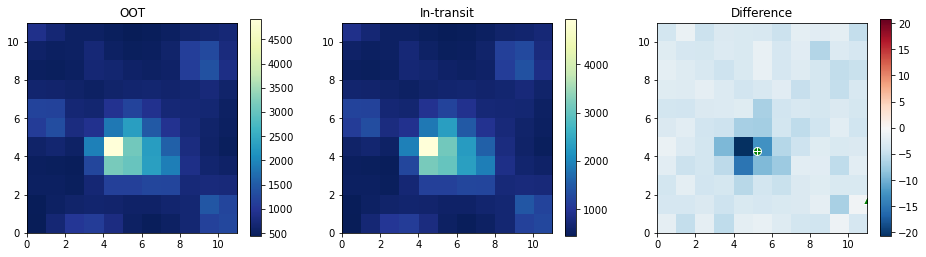

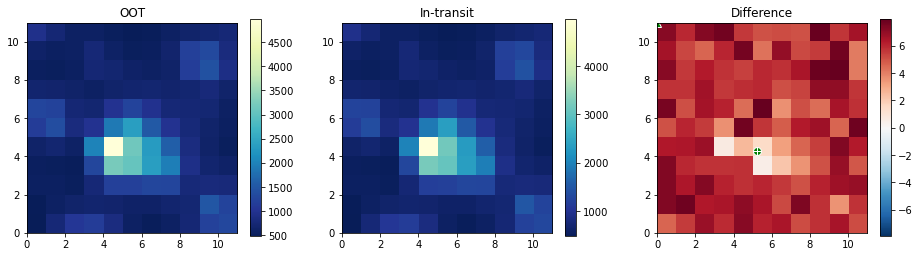

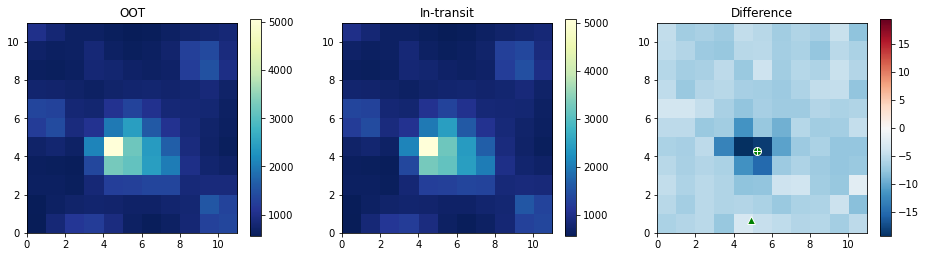

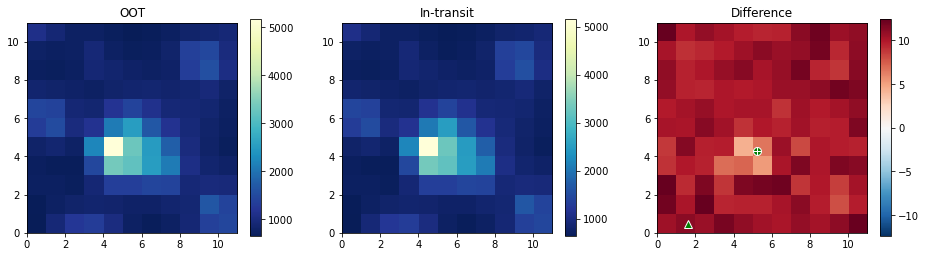

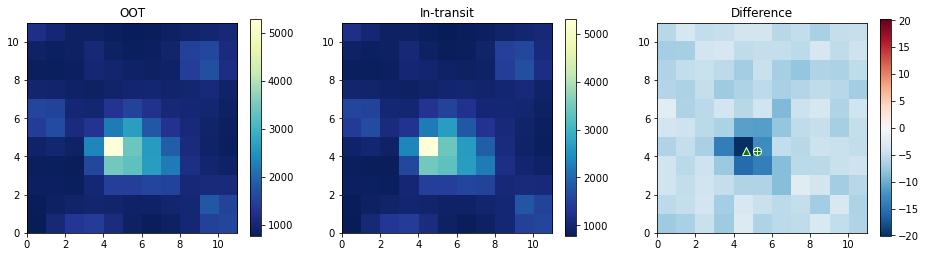

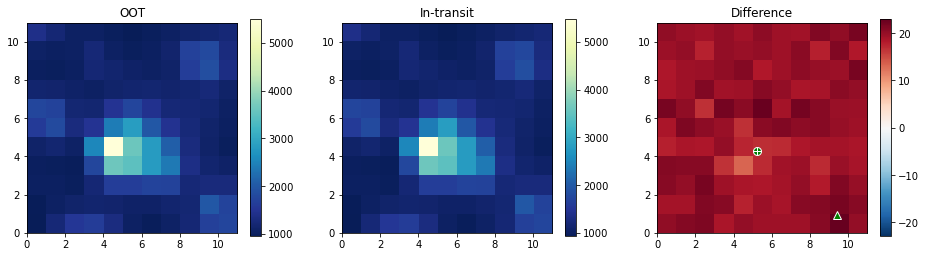

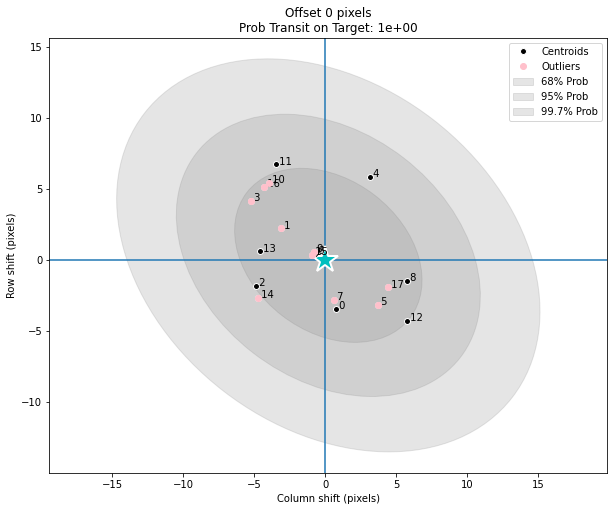

In [6]:
atce = make_tce(tcedf.iloc[0])
vet_tce(atce, alc, atpf)